## Neural network Homework 1  \   Q4 part A- efficient neural network -config2 -regression

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

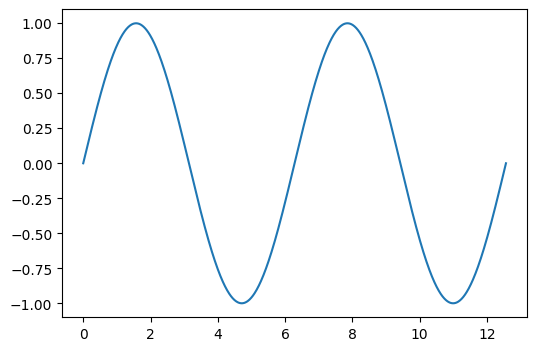

In [ ]:
num_points = 1000
x_values = np.linspace(0, 4*np.pi, num_points)
y_values = np.sin(x_values)

plt.figure(figsize=(6,4))
plt.plot(x_values, y_values)
plt.show()

## part A : Training for training size = 900 and test size = 100

In [ ]:
rgn = np.random.RandomState(5)

train_size = 900

data = np.stack((x_values, y_values), axis=0)
rgn.shuffle(data)
x_values_shuffled = data[0,:]
y_values_shuffled = data[0,:]

x_train, x_test = x_values_shuffled[:train_size], x_values_shuffled[train_size:]
y_train, y_test = y_values_shuffled[:train_size], y_values_shuffled[train_size:]

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

X_test = torch.from_numpy(x_test)
Y_test = torch.from_numpy(y_test)



Epoch 100: Training Loss = 0.37533387541770935, Test Loss = 0.35806846618652344
Epoch 200: Training Loss = 0.326763778924942, Test Loss = 0.2993888854980469
Epoch 300: Training Loss = 0.2902960181236267, Test Loss = 0.2619657814502716
Epoch 400: Training Loss = 0.2505896985530853, Test Loss = 0.2251528799533844
Epoch 500: Training Loss = 0.20953427255153656, Test Loss = 0.18801765143871307
Epoch 600: Training Loss = 0.17168182134628296, Test Loss = 0.1538539081811905
Epoch 700: Training Loss = 0.140037402510643, Test Loss = 0.1254109889268875
Epoch 800: Training Loss = 0.11581458896398544, Test Loss = 0.10373729467391968
Epoch 900: Training Loss = 0.09867557883262634, Test Loss = 0.08834058791399002
Epoch 1000: Training Loss = 0.08728087693452835, Test Loss = 0.07814376056194305
Epoch 1100: Training Loss = 0.07997850328683853, Test Loss = 0.07165390253067017
Epoch 1200: Training Loss = 0.07531851530075073, Test Loss = 0.0677078440785408
Epoch 1300: Training Loss = 0.07225040346384048, 

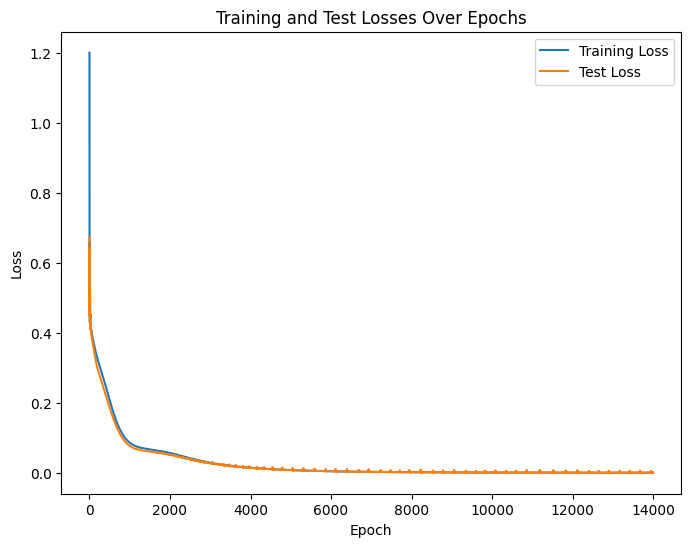

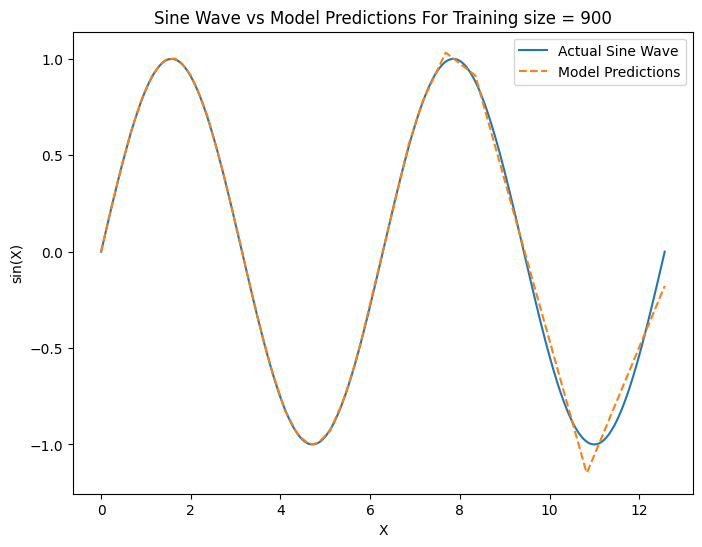

In [ ]:

# Ensure reproducibility
random_state = 4
np.random.seed(random_state)
torch.manual_seed(random_state)
torch.cuda.manual_seed(random_state)
torch.cuda.manual_seed_all(random_state)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Generate sine wave data
num_points = 1000
x_values = np.linspace(0, 4*np.pi, num_points)
y_values = np.sin(x_values)
# Prepare the data
rgn = np.random.RandomState(random_state)
train_size = 900
data = np.stack((x_values, y_values), axis=1)
rgn.shuffle(data)
x_values_shuffled = data[:, 0]
y_values_shuffled = data[:, 1]
x_train, x_test = x_values_shuffled[:train_size], x_values_shuffled[train_size:]
y_train, y_test = y_values_shuffled[:train_size], y_values_shuffled[train_size:]

X_train = torch.from_numpy(x_train).float().view(-1, 1)
Y_train = torch.from_numpy(y_train).float().view(-1, 1)
X_test = torch.from_numpy(x_test).float().view(-1, 1)
Y_test = torch.from_numpy(y_test).float().view(-1, 1)


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Input layer to first hidden layer
        self.fc1 = nn.Linear(1, 160)
        self.fc2 = nn.Linear(160, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()


class Training_FCN:
    def __init__(self,model,epochs= 1000, learning_rate= 0.01, random_state=None):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.model = model

    def fit(self, X_train, Y_train, X_test, Y_test):
        # Training loop
        self.shape = X_train.shape[0]
        self.train_losses = []
        self.test_losses = []

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        for epoch in range(self.epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_train)
            loss = criterion(outputs, Y_train)
            loss.backward()
            optimizer.step()
            self.train_losses.append(loss.item())

            self.model.eval()
            with torch.no_grad():
                test_predictions = self.model(X_test)
                test_loss = criterion(test_predictions, Y_test)
                self.test_losses.append(test_loss.item())
            if epoch % 100 == 99:
                print(f'Epoch {epoch+1}: Training Loss = {loss.item()}, Test Loss = {test_loss.item()}')
        return self

    def prediction(self):
        # Generate predictions for the entire dataset
        self.model.eval()
        with torch.no_grad():
            x_all = torch.from_numpy(np.linspace(0, 4*np.pi, self.shape)).float().view(-1, 1)
            predictions_all = self.model(x_all)
        # Convert to numpy for plotting
        self.x_all_np = x_all.numpy().flatten()
        self.predictions_all_np = predictions_all.numpy().flatten()
        return self

model1 = Training_FCN(model,epochs= 14000, learning_rate= 0.001, random_state=random_state)
model1.fit( X_train,Y_train, X_test, Y_test)

def plotsA (model, figsize=(8, 6)):
    model.prediction()
    # Plotting training and test losses
    plt.figure(figsize=(8, 6))
    plt.plot(model.train_losses, label='Training Loss')
    plt.plot(model.test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Losses Over Epochs')
    plt.legend(loc='upper right')
    plt.show()

    # Plotting the actual sine wave and the model's predictions
    plt.figure(figsize=(8, 6))
    plt.plot(model.x_all_np, np.sin(model.x_all_np), label='Actual Sine Wave')
    plt.plot(model.x_all_np, model.predictions_all_np, label='Model Predictions', linestyle='--')
    plt.xlabel('X')
    plt.ylabel('sin(X)')
    plt.title('Sine Wave vs Model Predictions For Training size = 900')
    plt.legend(loc='upper right')
    plt.show()

plotsA(model1)

## part B : Decreasing training set size

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 160)
        self.fc2 = nn.Linear(160, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()


class Training_FCN:
    def __init__(self,model,epochs= 1000, learning_rate= 0.01, random_state=None):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.model = model

    def fit(self, X_train, Y_train, X_test, Y_test):
        # Training loop
        self.shape = X_train.shape[0]
        self.train_losses = []
        self.test_losses = []

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        for epoch in range(self.epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_train)
            loss = criterion(outputs, Y_train)
            loss.backward()
            optimizer.step()
            self.train_losses.append(loss.item())

            self.model.eval()
            with torch.no_grad():
                test_predictions = self.model(X_test)
                test_loss = criterion(test_predictions, Y_test)
                self.test_losses.append(test_loss.item())
            if epoch % 100 == 99:
                print(f'Epoch {epoch+1}: Training Loss = {loss.item()}, Test Loss = {test_loss.item()}')
        return self

    def prediction(self):
        # Generate predictions for the entire dataset
        self.model.eval()
        with torch.no_grad():
            x_all = torch.from_numpy(np.linspace(0, 4*np.pi, self.shape)).float().view(-1, 1)
            predictions_all = self.model(x_all)
        # Convert to numpy for plotting
        self.x_all_np = x_all.numpy().flatten()
        self.predictions_all_np = predictions_all.numpy().flatten()
        return self


Models = {}
for i in range(1, 10):
    # Ensure reproducibility
    random_state = 4
    np.random.seed(random_state)
    torch.manual_seed(random_state)
    torch.cuda.manual_seed(random_state)
    torch.cuda.manual_seed_all(random_state)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    num_points = 1000
    x_values = np.linspace(0, 4*np.pi, num_points)
    y_values = np.sin(x_values)

    rgn = np.random.RandomState(random_state)
    train_size = num_points - (100 * i)
    data = np.stack((x_values, y_values), axis=1)
    rgn.shuffle(data)
    x_values_shuffled = data[:, 0]
    y_values_shuffled = data[:, 1]
    x_train, x_test = x_values_shuffled[:train_size], x_values_shuffled[train_size:]
    y_train, y_test = y_values_shuffled[:train_size], y_values_shuffled[train_size:]

    X_train = torch.from_numpy(x_train).float().view(-1, 1)
    Y_train = torch.from_numpy(y_train).float().view(-1, 1)
    X_test = torch.from_numpy(x_test).float().view(-1, 1)
    Y_test = torch.from_numpy(y_test).float().view(-1, 1)

    print(f'Training model for iteration {i} -------------------------> size of training set = {train_size}')
    modeli = Training_FCN(SimpleNN(), epochs=14000, learning_rate=0.001, random_state=random_state)
    modeli.fit(X_train, Y_train, X_test, Y_test)
    Models[train_size] = modeli
'''
# Plot the last training loss for each model
loss_for_all_iterations = [Model.train_losses[-1] for Model in Models.values()]
test_loss_for_all_iterations = [Model.test_losses[-1] for Model in Models.values()]
'''
loss_for_all_iterations = []
test_loss_for_all_iterations = []

for Model in Models.values():
    # Find the index of the minimum training loss for the current model
    min_loss_index = Model.train_losses.index(min(Model.train_losses))
    # Append the minimum training loss to the min_train_losses list
    loss_for_all_iterations.append(Model.train_losses[min_loss_index])
    # Append the corresponding test loss to the corresponding_test_losses list
    test_loss_for_all_iterations.append(Model.test_losses[min_loss_index])


training_sizes = list(Models.keys())






Training model for iteration 1 -------------------------> size of training set = 900
Epoch 100: Training Loss = 0.37533387541770935, Test Loss = 0.35806846618652344
Epoch 200: Training Loss = 0.326763778924942, Test Loss = 0.2993888854980469
Epoch 300: Training Loss = 0.2902960181236267, Test Loss = 0.2619657814502716
Epoch 400: Training Loss = 0.2505896985530853, Test Loss = 0.2251528799533844
Epoch 500: Training Loss = 0.20953427255153656, Test Loss = 0.18801765143871307
Epoch 600: Training Loss = 0.17168182134628296, Test Loss = 0.1538539081811905
Epoch 700: Training Loss = 0.140037402510643, Test Loss = 0.1254109889268875
Epoch 800: Training Loss = 0.11581458896398544, Test Loss = 0.10373729467391968
Epoch 900: Training Loss = 0.09867557883262634, Test Loss = 0.08834058791399002
Epoch 1000: Training Loss = 0.08728087693452835, Test Loss = 0.07814376056194305
Epoch 1100: Training Loss = 0.07997850328683853, Test Loss = 0.07165390253067017
Epoch 1200: Training Loss = 0.07531851530075

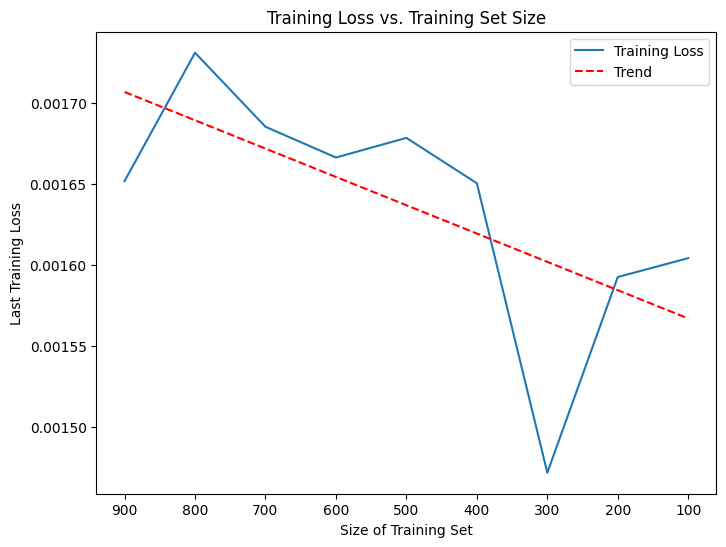

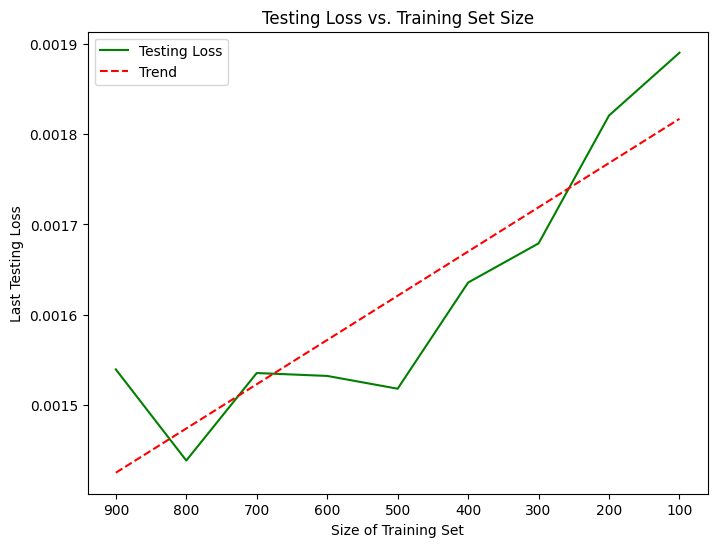

In [ ]:
# Plot for Training Loss
plt.figure(figsize=(8, 6))
plt.plot(training_sizes, loss_for_all_iterations, label='Training Loss')
# Calculate and plot the trend line for Training Loss
z = np.polyfit(training_sizes, loss_for_all_iterations, 1)  # Linear fit
p = np.poly1d(z)
plt.plot(training_sizes, p(training_sizes), "r--", label='Trend')
plt.xlabel('Size of Training Set')
plt.ylabel('Last Training Loss')
plt.title('Training Loss vs. Training Set Size')
plt.gca().invert_xaxis()  # Invert x-axis
plt.legend()
plt.show()

# Plot for Testing Loss
plt.figure(figsize=(8, 6))
plt.plot(training_sizes, test_loss_for_all_iterations, 'g', label='Testing Loss')
# Calculate and plot the trend line for Testing Loss
z_test = np.polyfit(training_sizes, test_loss_for_all_iterations, 1)  # Linear fit
p_test = np.poly1d(z_test)
plt.plot(training_sizes, p_test(training_sizes), "r--", label='Trend')
plt.xlabel('Size of Training Set')
plt.ylabel('Last Testing Loss')
plt.title('Testing Loss vs. Training Set Size')
plt.gca().invert_xaxis()  # Invert x-axis
plt.legend()
plt.show()

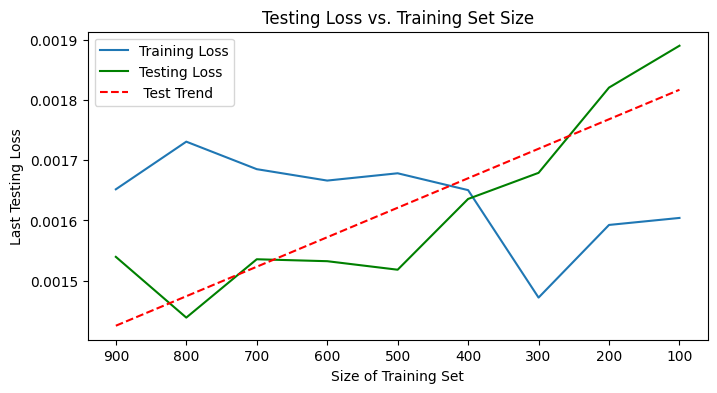

In [ ]:
# Plot for Training Loss
plt.figure(figsize=(8, 4))
plt.plot(training_sizes, loss_for_all_iterations, label='Training Loss')
# Calculate and plot the trend line for Training Loss
z = np.polyfit(training_sizes, loss_for_all_iterations, 1)  # Linear fit
p = np.poly1d(z)

plt.plot(training_sizes, test_loss_for_all_iterations, 'g', label='Testing Loss')
# Calculate and plot the trend line for Testing Loss
z_test = np.polyfit(training_sizes, test_loss_for_all_iterations, 1)  # Linear fit
p_test = np.poly1d(z_test)
plt.plot(training_sizes, p_test(training_sizes), "r--", label=' Test Trend')
plt.xlabel('Size of Training Set')
plt.ylabel('Last Testing Loss')
plt.title('Testing Loss vs. Training Set Size')
plt.gca().invert_xaxis()  # Invert x-axis
plt.legend()
plt.show()

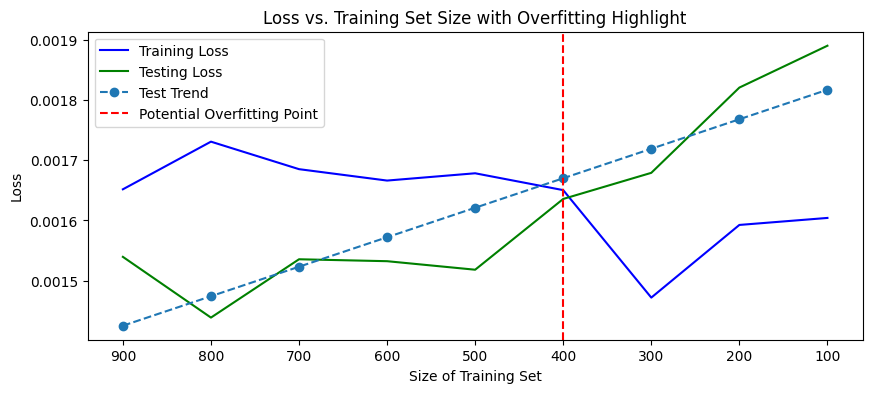

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))

# Assuming training_sizes, loss_for_all_iterations (Training Loss),
# and test_loss_for_all_iterations (Testing Loss) are defined.
plt.plot(training_sizes, loss_for_all_iterations, 'b', label='Training Loss')

# Trend line for Training Loss
z = np.polyfit(training_sizes, loss_for_all_iterations, 1)
p = np.poly1d(z)

plt.plot(training_sizes, test_loss_for_all_iterations, 'g', label='Testing Loss')

# Trend line for Testing Loss
z_test = np.polyfit(training_sizes, test_loss_for_all_iterations, 1)
p_test = np.poly1d(z_test)
plt.plot(training_sizes, p_test(training_sizes), "o--", label='Test Trend')

# Highlight potential overfitting area
# Here you might want to identify the point of divergence manually or programmatically
divergence_point = 400  # Example: assuming 400 is where testing loss stops decreasing
plt.axvline(x=divergence_point, color='r', linestyle='--', label='Potential Overfitting Point')

plt.xlabel('Size of Training Set')
plt.ylabel('Loss')
plt.title('Loss vs. Training Set Size with Overfitting Highlight')
plt.gca().invert_xaxis()  # Invert x-axis to show decreasing training set sizes
plt.legend()
plt.show()


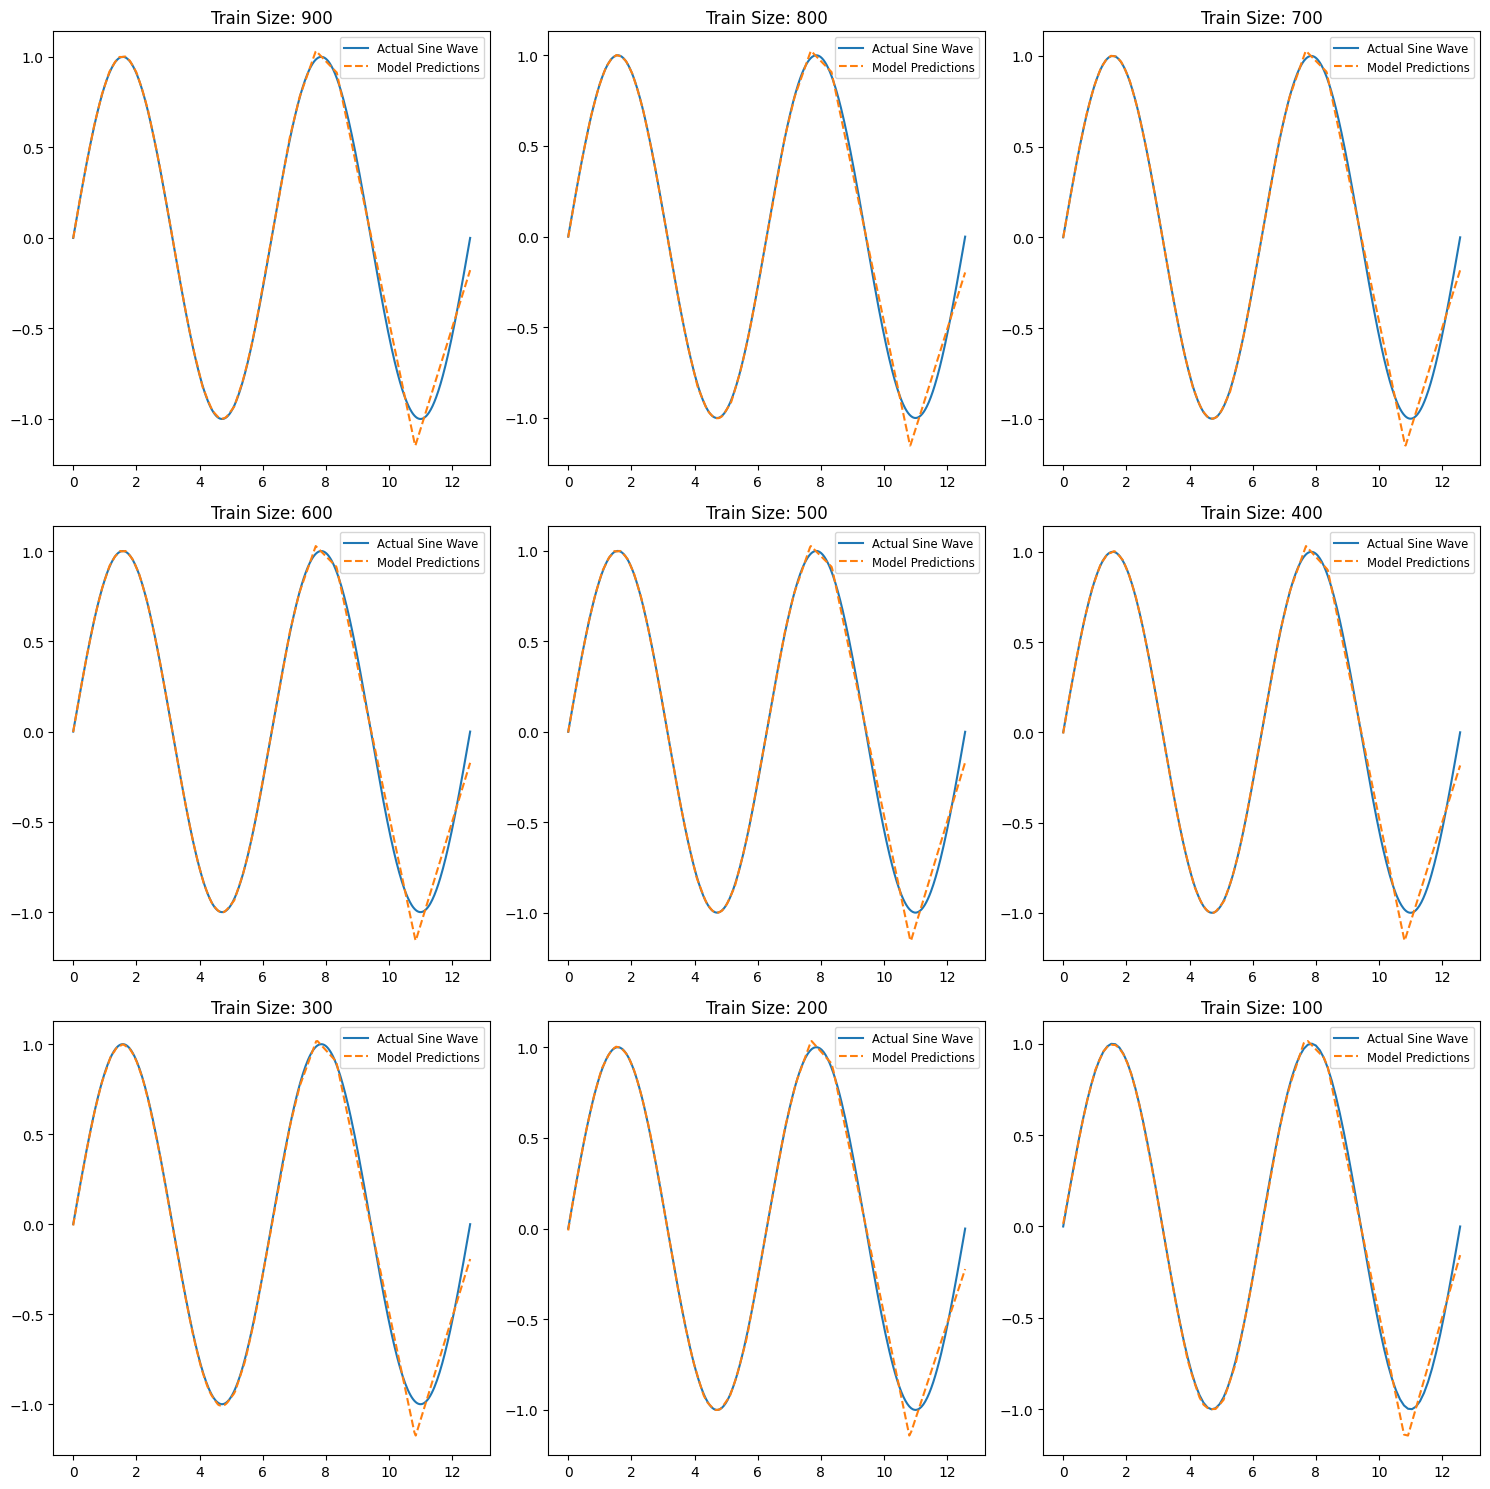

In [ ]:
import matplotlib.pyplot as plt

# Assuming `Models` dictionary is filled with your models and predictions are ready
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to easily iterate over it

# Sort the models by their training set size to plot them in order
sorted_models = sorted(Models.items(), key=lambda x: x[0], reverse=True)

for index, (train_size, model) in enumerate(sorted_models):
    # Generate predictions if not already done
    model.prediction()
    x_all_np = model.x_all_np
    predictions_all_np = model.predictions_all_np

    # Plotting on the respective subplot
    axs[index].plot(x_all_np, np.sin(x_all_np), label='Actual Sine Wave')
    axs[index].plot(x_all_np, predictions_all_np, label='Model Predictions', linestyle='--')
    axs[index].set_title(f'Train Size: {train_size}')
    # Adjust legend to use a smaller font size
    axs[index].legend(loc='upper right', fontsize='small')  # You can also use specific sizes like '10', 'x-small', etc.

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### showing in the GIF form with decreasing the training set size!

In [ ]:
pip install imageio


<ipython-input-11-45ef3fd71ae9>:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


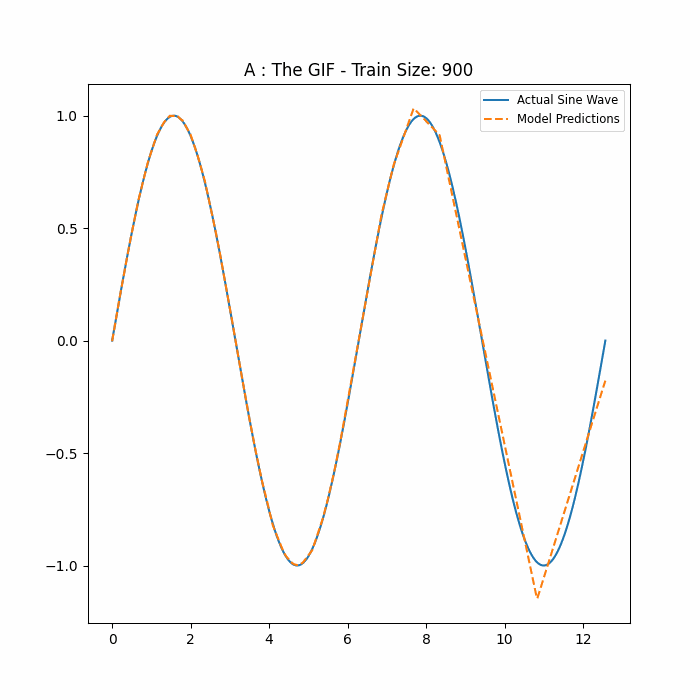

In [ ]:
import imageio
import os
from IPython.display import Image

os.makedirs('plots', exist_ok=True)
filenames = []

for index, (train_size, model) in enumerate(sorted_models):
    fig, ax = plt.subplots(figsize=(7, 7))
    model.prediction()
    ax.plot(model.x_all_np, np.sin(model.x_all_np), label='Actual Sine Wave')
    ax.plot(model.x_all_np, model.predictions_all_np, label='Model Predictions', linestyle='--')
    ax.set_title(f'A : The GIF - Train Size: {train_size}')
    ax.legend(loc='upper right', fontsize='small')
    filename = f'plots/plot_{index}.png'
    filenames.append(filename)
    # Save the plot
    plt.savefig(filename)
    plt.close()  # Close the plot to free memory

with imageio.get_writer('model_predictions.gif', mode='I', duration=1500) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, remove the saved plot images to clean up
for filename in filenames:
    os.remove(filename)

# Display the GIF
Image(filename='model_predictions.gif')


# part C : increasing numbers of hidden layers

In [ ]:
# Check if CUDA is available and set the device
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [ ]:
class DynamicNN(nn.Module):
    def __init__(self, num_hidden_layers):
        super(DynamicNN, self).__init__()
        input_size = 1
        hidden_size = 64
        output_size = 1

        layers = [nn.Linear(input_size, hidden_size), nn.ReLU()]
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_size, output_size))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

models_with_different_layers = []

for i in range(1, 21):
    model = DynamicNN(num_hidden_layers=i).to(device)  # Move model to the appropriate device
    models_with_different_layers.append(model)

print("Model with 1 hidden layer architecture:")
print(models_with_different_layers[0])
print("\nModel with 20 hidden layers architecture:")
print(models_with_different_layers[-1])

class Training_FCN:
    def __init__(self,model,epochs= 32, learning_rate= 0.01, random_state=None):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.model = model.to(device)  # Ensure model is on the correct device

    def fit(self, X_train, Y_train, X_test, Y_test):
        # Training loop
        self.shape = X_train.shape[0]
        self.train_losses = []
        self.test_losses = []

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        for epoch in range(self.epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_train)
            loss = criterion(outputs, Y_train)
            loss.backward()
            optimizer.step()
            self.train_losses.append(loss.item())

            self.model.eval()
            with torch.no_grad():
                test_predictions = self.model(X_test)
                test_loss = criterion(test_predictions, Y_test)
                self.test_losses.append(test_loss.item())
            if epoch % 100 == 99:
                print(f'Epoch {epoch+1}: Training Loss = {loss.item()}, Test Loss = {test_loss.item()}')
        return self

    def prediction(self, x_values):
        # Ensure this method accepts external inputs for flexibility
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(x_values.to(device))
        return predictions.cpu()

Models = {}

# Ensure reproducibility
random_state = 4
np.random.seed(random_state)
torch.manual_seed(random_state)
torch.cuda.manual_seed(random_state)
torch.cuda.manual_seed_all(random_state)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

num_points = 1000
x_values = np.linspace(0, 4*np.pi, num_points)
y_values = np.sin(x_values)

rgn = np.random.RandomState(random_state)
train_size = 900
data = np.stack((x_values, y_values), axis=1)
rgn.shuffle(data)
x_values_shuffled = data[:, 0]
y_values_shuffled = data[:, 1]
x_train, x_test = x_values_shuffled[:train_size], x_values_shuffled[train_size:]
y_train, y_test = y_values_shuffled[:train_size], y_values_shuffled[train_size:]

X_train = torch.from_numpy(x_train).float().view(-1, 1).to(device)
Y_train = torch.from_numpy(y_train).float().view(-1, 1).to(device)
X_test = torch.from_numpy(x_test).float().view(-1, 1).to(device)
Y_test = torch.from_numpy(y_test).float().view(-1, 1).to(device)

for i in range(1, 21):
    print(f'Training model for iteration {i} -------------------------> hidden layers = {i}')
    modeli = Training_FCN(models_with_different_layers[i-1], epochs=14000, learning_rate=0.001, random_state=random_state)
    modeli.fit(X_train, Y_train, X_test, Y_test)
    Models[i] = modeli



Model with 1 hidden layer architecture:
DynamicNN(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

Model with 20 hidden layers architecture:
DynamicNN(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=64, bias=True)
    (13): ReLU()
    (14): Linear(in_features=64, out_features=64, bias=True)
    (15): ReLU()
    (16): Linear(in_features=64, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear

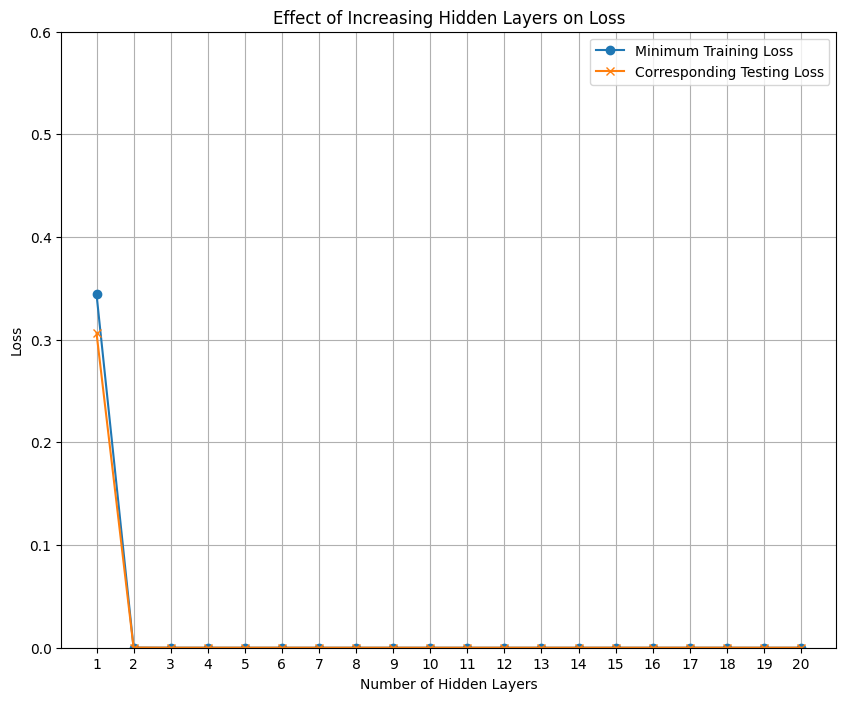

In [ ]:
'''
print("Minimum Training Losses:", min_train_losses)
print("Corresponding Testing Losses:", min_test_losses)
training_losses = [Model.train_losses[-1] for Model in Models.values()]
testing_losses = [Model.test_losses[-1] for Model in Models.values()]



# Plot Training and Testing Losses
plt.figure(figsize=(10, 8))
plt.plot(hidden_layers, training_losses, label='Training Loss', marker='o')
plt.plot(hidden_layers, testing_losses, label='Testing Loss', marker='x')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Loss')
plt.ylim(0,0.6)
plt.title('Effect of Increasing Hidden Layers on Loss')
plt.xticks(hidden_layers)  # Ensure each hidden layer count is marked
plt.legend()
plt.grid(True)
plt.show()

print(training_losses)
print(testing_losses)
'''

# Prepare the data for plotting
hidden_layers = range(1, 21)  # Hidden layers from 1 to 20
# Prepare the data for plotting
min_train_losses = []
min_test_losses = []

for Model in Models.values():
    # Find the index of the minimum training loss for the current model
    min_train_loss_index = Model.train_losses.index(min(Model.train_losses))
    # Append the minimum training loss to the min_train_losses list
    min_train_losses.append(Model.train_losses[min_train_loss_index])
    # Append the corresponding test loss to the min_test_losses list
    min_test_losses.append(Model.test_losses[min_train_loss_index])

# Plot Training and Testing Losses
plt.figure(figsize=(10, 8))
plt.plot(hidden_layers, min_train_losses, label='Minimum Training Loss', marker='o')
plt.plot(hidden_layers, min_test_losses, label='Corresponding Testing Loss', marker='x')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Loss')
plt.ylim(0, 0.6)
plt.title('Effect of Increasing Hidden Layers on Loss')
plt.xticks(hidden_layers)  # Ensure each hidden layer count is marked
plt.legend()
plt.grid(True)
plt.show()

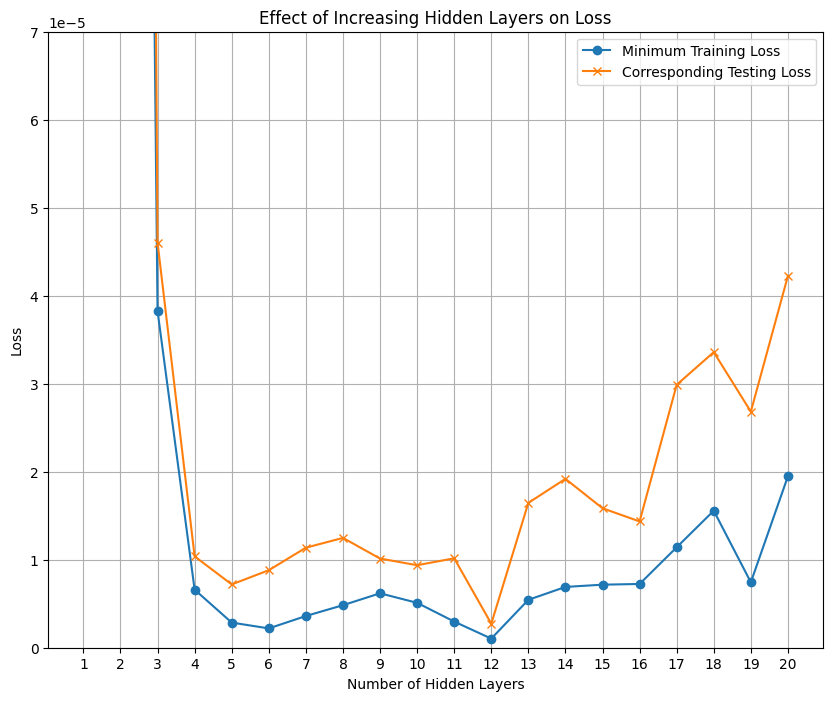

In [ ]:
# Plot Training and Testing Losses
plt.figure(figsize=(10, 8))
plt.plot(hidden_layers, min_train_losses, label='Minimum Training Loss', marker='o')
plt.plot(hidden_layers, min_test_losses, label='Corresponding Testing Loss', marker='x')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Loss')
plt.ylim(0, 0.00007)
plt.title('Effect of Increasing Hidden Layers on Loss')
plt.xticks(hidden_layers)  # Ensure each hidden layer count is marked
plt.legend()
plt.grid(True)
plt.show()

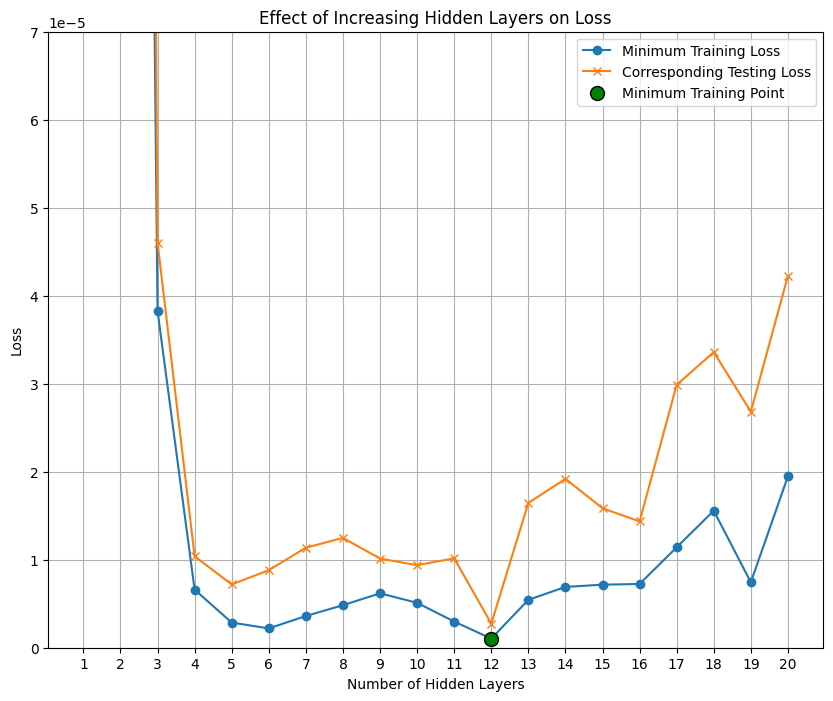

In [ ]:
import matplotlib.pyplot as plt

# Assuming hidden_layers, min_train_losses, and min_test_losses are already defined

# Find the index of the minimum training loss
min_train_loss_index = min_train_losses.index(min(min_train_losses))

# Plot Training and Testing Losses
plt.figure(figsize=(10, 8))
plt.plot(hidden_layers, min_train_losses, label='Minimum Training Loss', marker='o')
plt.plot(hidden_layers, min_test_losses, label='Corresponding Testing Loss', marker='x')

# Highlight the minimum training loss point
plt.scatter(hidden_layers[min_train_loss_index], min_train_losses[min_train_loss_index], color='green', s=100, edgecolor='black', zorder=5, label='Minimum Training Point')

plt.xlabel('Number of Hidden Layers')
plt.ylabel('Loss')
plt.ylim(0, 0.00007)
plt.title('Effect of Increasing Hidden Layers on Loss')
plt.xticks(hidden_layers)  # Ensure each hidden layer count is marked
plt.legend()
plt.grid(True)
plt.show()

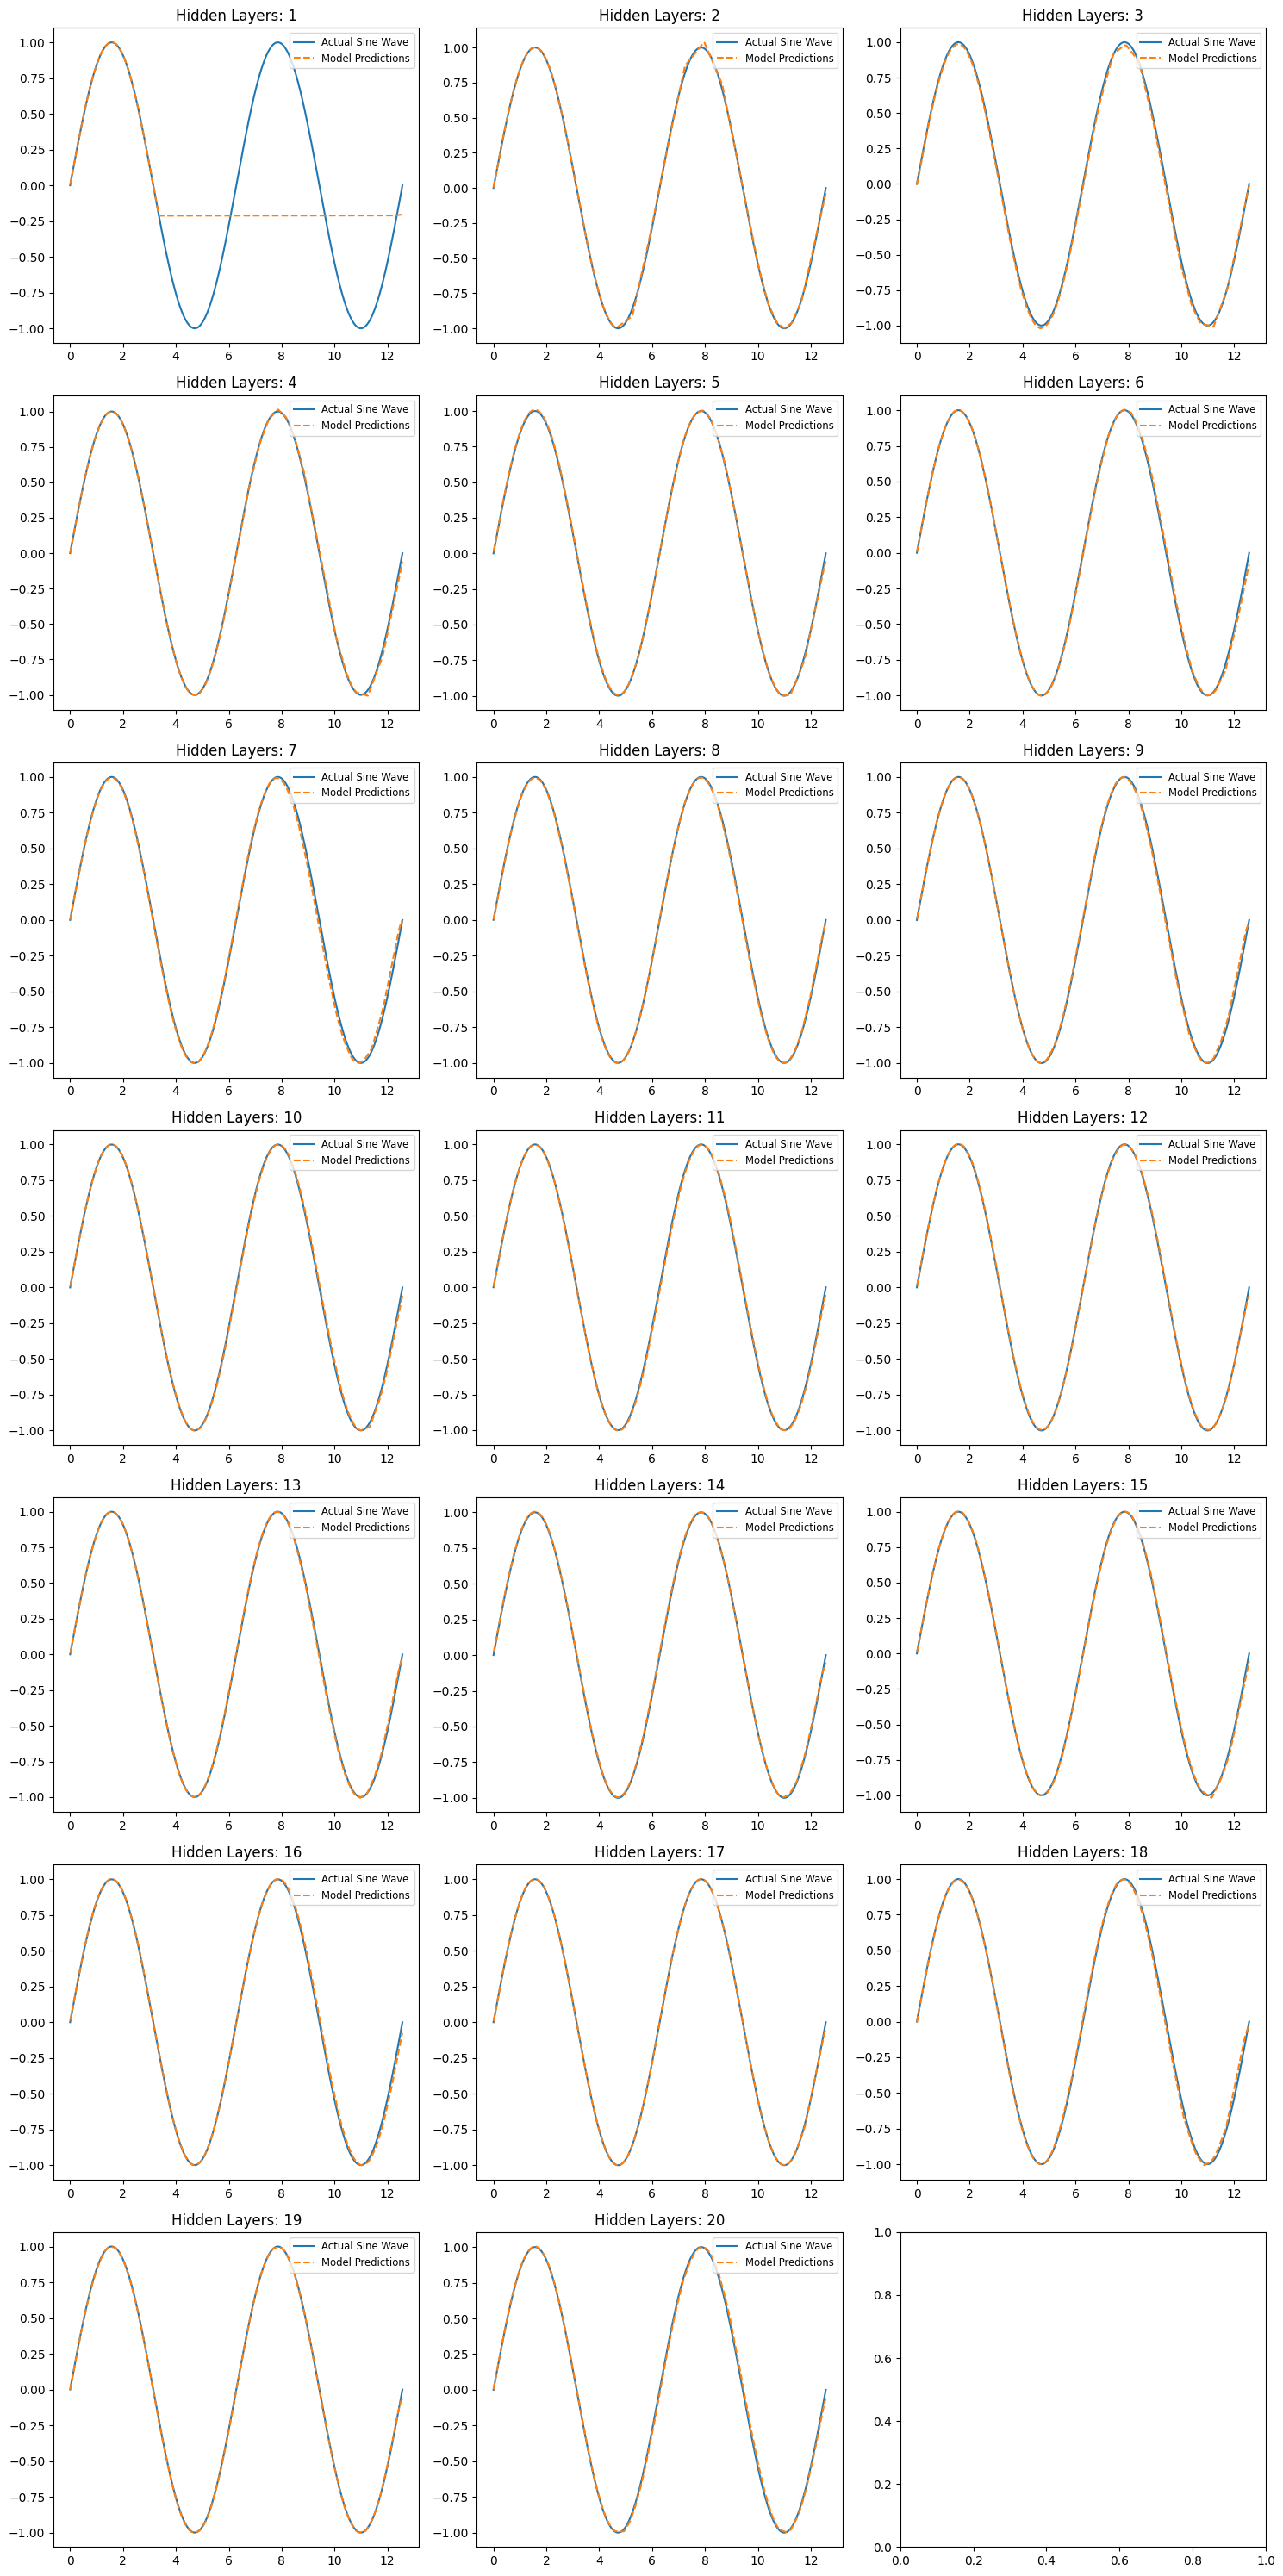

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Assuming 'Models' dictionary is filled with your models and their predictions are ready
# Also assuming the device setup as earlier
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Generate a new set of x values for predictions, covering the same range used in training
x_values_plot = np.linspace(0, 4*np.pi, 1000)
X_values_plot_tensor = torch.from_numpy(x_values_plot).float().view(-1, 1).to(device)

fig, axs = plt.subplots(7, 3, figsize=(15, 30))  # Create a 3x3 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to easily iterate over it

# It's no longer about sorting by training set size but by the number of hidden layers
# Assuming 'Models' contains models indexed by their hidden layer count
for index, (hidden_layer_count, model) in enumerate(Models.items()):
    # Use the prediction method you adjusted earlier
    predictions_all = model.prediction(X_values_plot_tensor).cpu().numpy().flatten()

    # Plotting on the respective subplot
    axs[index].plot(x_values_plot, np.sin(x_values_plot), label='Actual Sine Wave')
    axs[index].plot(x_values_plot, predictions_all, label='Model Predictions', linestyle='--')
    axs[index].set_title(f'Hidden Layers: {hidden_layer_count}')
    axs[index].legend(loc='upper right', fontsize='small')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### part C : results of increasing the  numbers of hidden layers

<ipython-input-10-bce31d698bf6>:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


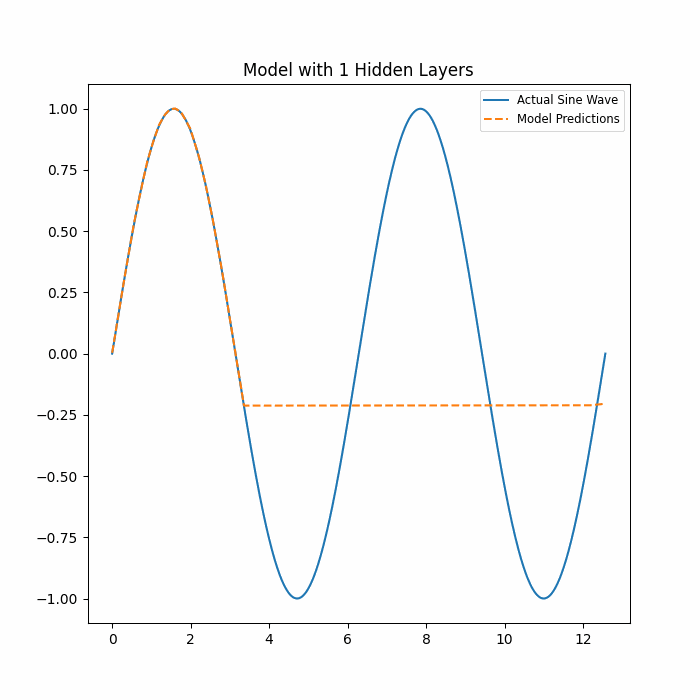

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import imageio
import os
from IPython.display import Image

# Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_values_plot = np.linspace(0, 4 * np.pi, 1000)
X_values_plot_tensor = torch.from_numpy(x_values_plot).float().view(-1, 1).to(device)

# Create directory for plots
os.makedirs('plots', exist_ok=True)
filenames = []

# Generate plots
for index, (hidden_layer_count, model) in enumerate(sorted(Models.items(), key=lambda x: x[0])):
    fig, ax = plt.subplots(figsize=(7, 7))
    predictions_all = model.prediction(X_values_plot_tensor).cpu().numpy().flatten()
    ax.plot(x_values_plot, np.sin(x_values_plot), label='Actual Sine Wave')
    ax.plot(x_values_plot, predictions_all, label='Model Predictions', linestyle='--')
    ax.set_title(f'Model with {hidden_layer_count} Hidden Layers')
    ax.legend(loc='upper right', fontsize='small')

    # Save each plot
    filename = f'plots/model_{hidden_layer_count}_layers.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

# Create GIF
gif_filename = 'model_predictions2.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1000) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up saved images
for filename in filenames:
    os.remove(filename)

# Display the GIF
Image(filename='model_predictions2.gif')

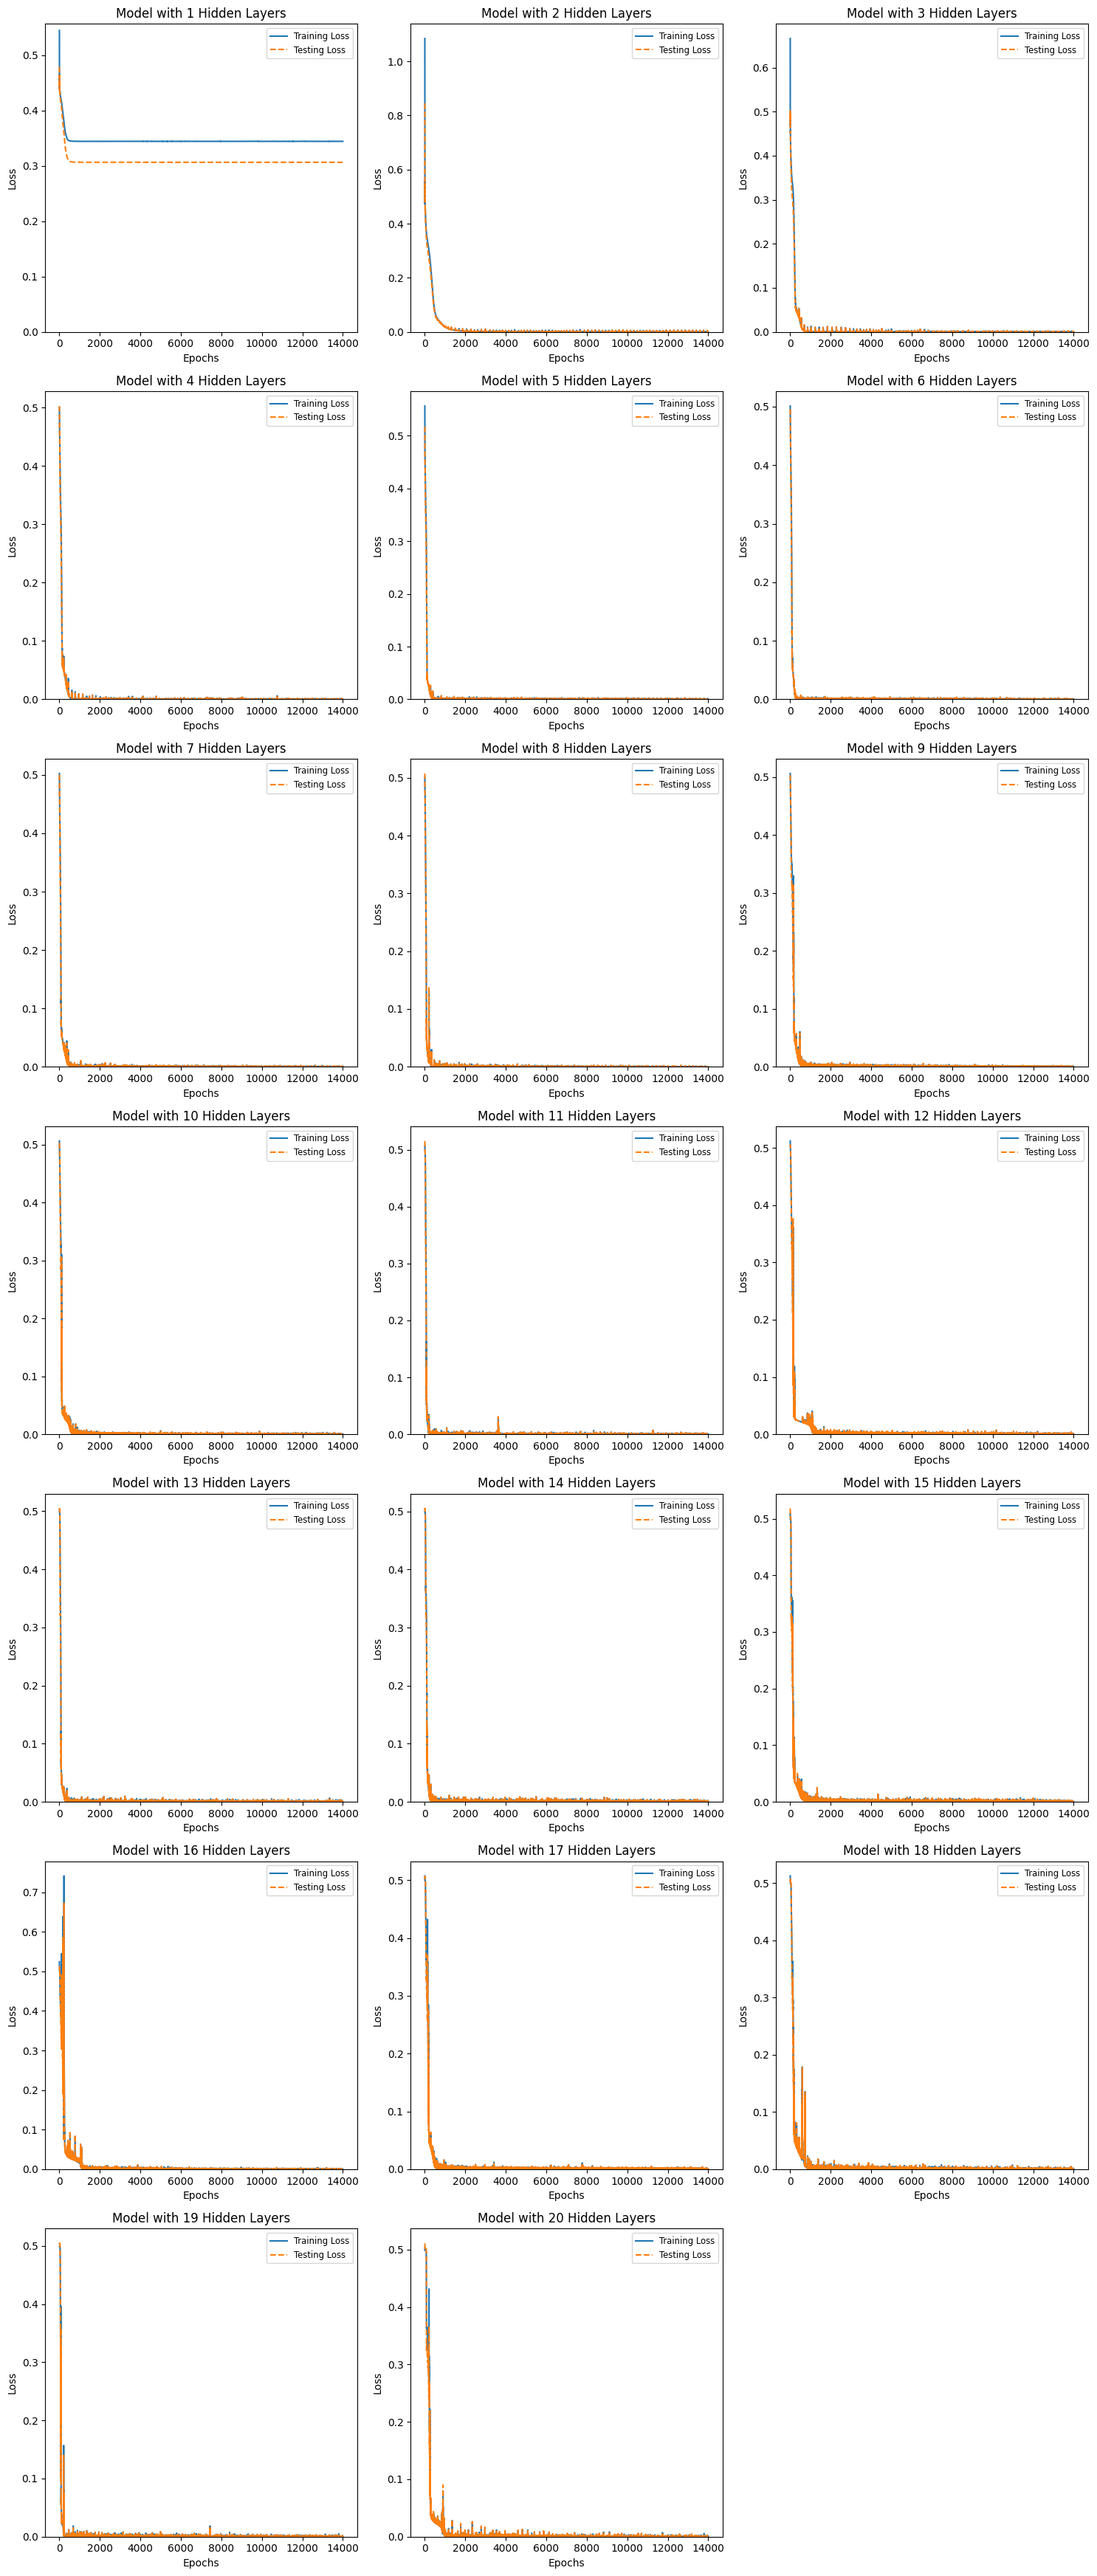

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Models' dictionary is filled with your models
# and each model has 'train_losses' and 'test_losses' attributes
# The device setup is assumed as earlier

fig, axs = plt.subplots(7, 3, figsize=(15, 35))  # Adjust the subplot grid if needed
axs = axs.flatten()  # Flatten the 2D array of axes to easily iterate over it

# Iterate through the models, sorted by the number of hidden layers (key in Models)
for index, (hidden_layer_count, model) in enumerate(sorted(Models.items())):
    # Access the stored losses
    train_losses = model.train_losses
    test_losses = model.test_losses

    # Plotting on the respective subplot
    epochs = range(1, len(train_losses) + 1)
    axs[index].plot(epochs, train_losses, label='Training Loss')
    axs[index].plot(epochs, test_losses, label='Testing Loss', linestyle='--')
    axs[index].set_title(f'Model with {hidden_layer_count} Hidden Layers')
    axs[index].set_xlabel('Epochs')
    axs[index].set_ylabel('Loss')
    axs[index].legend(loc='upper right', fontsize='small')

    # Set the minimum y-axis limit to 0 for all plots
    axs[index].set_ylim(bottom=0)

# Remove unused subplots if any
for ax in axs[index + 1:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


### part C : Gif of losses

<ipython-input-12-d9c161926dc7>:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


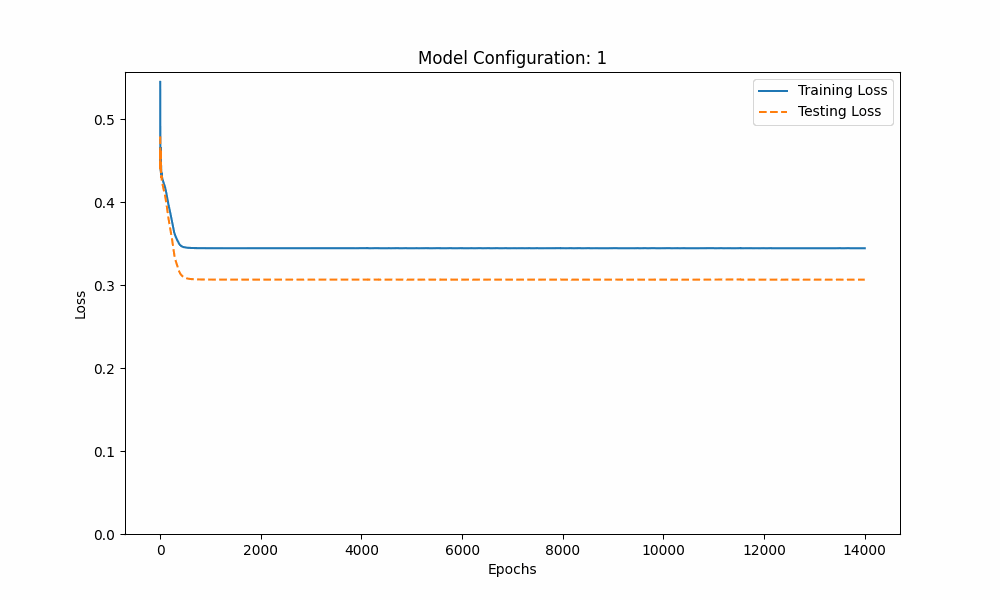

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from IPython.display import Image

# Assuming 'Models' dictionary is filled with your models
# Each model should have 'train_losses' and 'test_losses' attributes

# Create directory for plots
os.makedirs('plots', exist_ok=True)
filenames = []

# Generate and save loss plots for each model configuration
for index, (config_key, model) in enumerate(sorted(Models.items(), key=lambda x: x[0])):
    fig, ax = plt.subplots(figsize=(10, 6))
    epochs = range(1, len(model.train_losses) + 1)
    ax.plot(epochs, model.train_losses, label='Training Loss')
    ax.plot(epochs, model.test_losses, linestyle='--', label='Testing Loss')
    ax.set_title(f'Model Configuration: {config_key}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_ylim(bottom=0)

    ax.legend(loc='upper right')
    filename = f'plots/loss_plot_{config_key}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

# Create GIF from saved images
gif_filename = 'loss_plots.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1000) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, remove the saved plot images to clean up
for filename in filenames:
    os.remove(filename)

# Display the GIF
Image(filename=gif_filename)


## part D : Grid search of numbers of hidden layers

In [2]:
pip install skorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
print(torch.cuda.is_available())


True


In [ ]:
print(torch.cuda.get_device_name(0))


Tesla T4


In [3]:
import numpy as np
import torch
import torch.nn as nn
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV
import sklearn
import matplotlib.pyplot as plt


device='cuda' if torch.cuda.is_available() else 'cpu',

# Ensure reproducibility
random_state = 4
np.random.seed(random_state)
torch.manual_seed(random_state)
torch.cuda.manual_seed(random_state)
torch.cuda.manual_seed_all(random_state)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import warnings
warnings.filterwarnings("ignore")


class DynamicNN(nn.Module):
    def __init__(self, num_hidden_layers=1, hidden_size=64, input_size=1, output_size=1):
        super(DynamicNN, self).__init__()
        layers = [nn.Linear(input_size, hidden_size), nn.ReLU()]
        for _ in range(num_hidden_layers - 1):
            layers.extend([nn.Linear(hidden_size, hidden_size), nn.ReLU()])
        layers.append(nn.Linear(hidden_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Function to initialize the model (required by Skorch)
def get_model(num_hidden_layers=1):
    model = DynamicNN(num_hidden_layers=num_hidden_layers)
    return model

# Generate synthetic data (for illustration)
np.random.seed(0)
x_values = np.linspace(-np.pi, np.pi, 1000).reshape(-1, 1).astype(np.float32)
y_values = np.sin(x_values).astype(np.float32)

# NeuralNetRegressor expects a dataset that yields floats
X_train = x_values
Y_train = y_values.ravel()  # Flatten Y_train to fit Skorch's expected shape

net = NeuralNetRegressor(
    module=get_model,
    module__num_hidden_layers=1,  # Default parameter, to be overridden by GridSearch
    criterion=nn.MSELoss,
    optimizer=torch.optim.Adam,
    max_epochs=100,
    lr=0.001,
    batch_size=128,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)

params = {
    'module__num_hidden_layers': range(1, 21),  # Search from 1 to 20 hidden layers
}

gs = sklearn.model_selection.GridSearchCV(net, params, refit=True, cv=3, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)
print('the best parameters are:------------------------------------------------------------------------')
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)


Streaming output truncated to the last 5000 lines.
-------  ------------  ------------  ------
      1        0.4314        0.7524  0.0320
      2        0.3496        0.5601  0.0347
      3        0.2890        0.9086  0.0390
      4        0.1760        1.1973  0.0377
      5        0.1432        1.0462  0.0324
      6        0.1420        0.9690  0.0330
      7        0.1297        0.9773  0.0355
      8        0.1148        0.9502  0.0318
      9        0.0943        0.8363  0.0341
     10        0.0879        0.5622  0.0333
     11        0.0479        0.3189  0.0344
     12        0.0949        0.4697  0.0315
     13        0.0864        0.5041  0.0417
     14        0.2209        0.7671  0.0401
     15        0.1339        0.9729  0.0420
     16        0.0940        0.9417  0.0362
     17        0.0911        0.8780  0.0328
     18        0.0673        0.7443  0.0313
     19        0.0479        0.5820  0.0399
     20        0.0506        0.5008  0.0477
     21        0.0460    